In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from scipy.signal import savgol_filter
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.signal import savgol_filter

In [3]:
data = pd.read_csv("/home/sonn/Son/Workspace/IR_PhanLoaiNuocCam/IR/data/processed/data_encoded.csv")

In [42]:
tenmau = data["TenMau"]

In [43]:
ma = []
for mau in tenmau:
    ma.append(mau.replace("/", ""))


In [44]:
len(ma)

260

In [45]:
data["TenMau"] = ma

In [46]:
data.head(3)

,TenMau,Ma,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,NA.23.xadoai.10,11,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,BG.23.vinh.02,0,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,NA.23.xadoai.03,11,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038


In [47]:
X = data.drop(['TenMau','Ma'], axis=1)

In [82]:
XDH = pd.DataFrame(savgol_filter(X, window_length=25, polyorder=3, deriv=1))


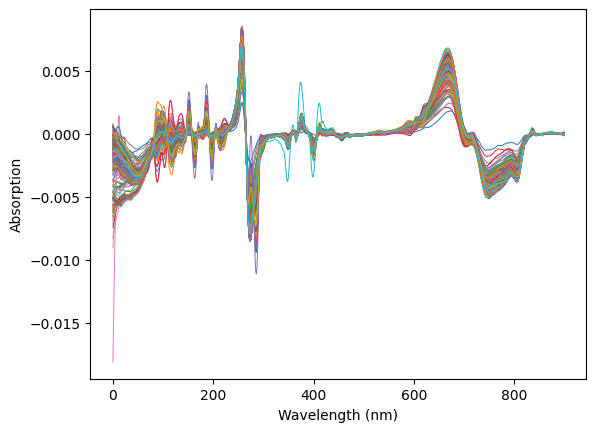

In [84]:
plt.plot(XDH.T, linewidth=0.7)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
plt.show()

In [48]:
len(X)

260

In [49]:
y = data["Ma"]

In [73]:
y

0      11
1       0
2      11
3       8
4      10
       ..
255     7
256     7
257     7
258     7
259     7
Name: Ma, Length: 260, dtype: int64

In [50]:
len(y)

260

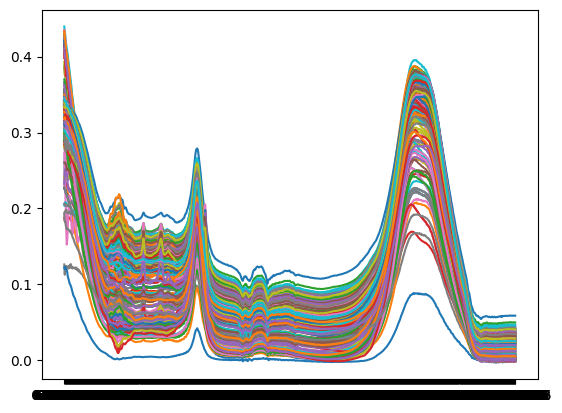

In [51]:
plt.plot(X.T)
plt.show()

In [75]:
labellist = data['TenMau'].values

In [76]:
labellist

array(['NA.23.xadoai.10', 'BG.23.vinh.02', 'NA.23.xadoai.03',
       'TQ.23.vinh.01', 'VL.23.sanh.10', 'NA.23.xadoai.08',
       'BG.23.vinh.01', 'TQ.23.Vinh.05', 'NA.23.xadoai.09',
       'VL.23.sanh.02', 'NA.23.xadoai.02', 'TV.23.sanh.09',
       'VL.23.sanh.09', 'BG.23.vinh.10', 'HG.23.xadoai.05',
       'TQ.23.Vinh.06', 'VL.23.sanh.06', 'VL.23.sanh.01', 'TQ.23.Vinh.10',
       'TQ.23.Vinh.03_2024-03-11T17-10-16', 'HG.23.xadoai.03',
       'VL.23.sanh.03', 'BG.23.vinh.09', 'HG.23.xadoai.02',
       'TV.23.sanh.02', 'TQ.23.Vinh.07', 'VL.23.sanh.05',
       'NA.23.xadoai.05', 'NA.23.xadoai.06', 'NA.23.xadoai.01',
       'TQ.23.vinh.02', 'TV.23.sanh.01', 'HG.23.xadoai.01',
       'TV.23.sanh.05', 'NA.23.xadoai.07', 'BG.23.vinh.07',
       'NA.23.xadoai.04', 'BG.23.vinh.05', 'BG.23.vinh.04',
       'TQ.23.Vinh.09', 'HG.23.xadoai.04', 'HB.23.caophong.05',
       'HB.23.caophong.06', 'HY.23.vinh.11', 'HY.23.vinh.16',
       'HY.23.vinh.14', 'HY.23.vinh.07', 'SL.23.duong.07',
       'HY.23

In [77]:
linked = linkage(X, metric='cosine', method='complete')

In [85]:
linkeddh = linkage(XDH, metric='cosine', method='complete')

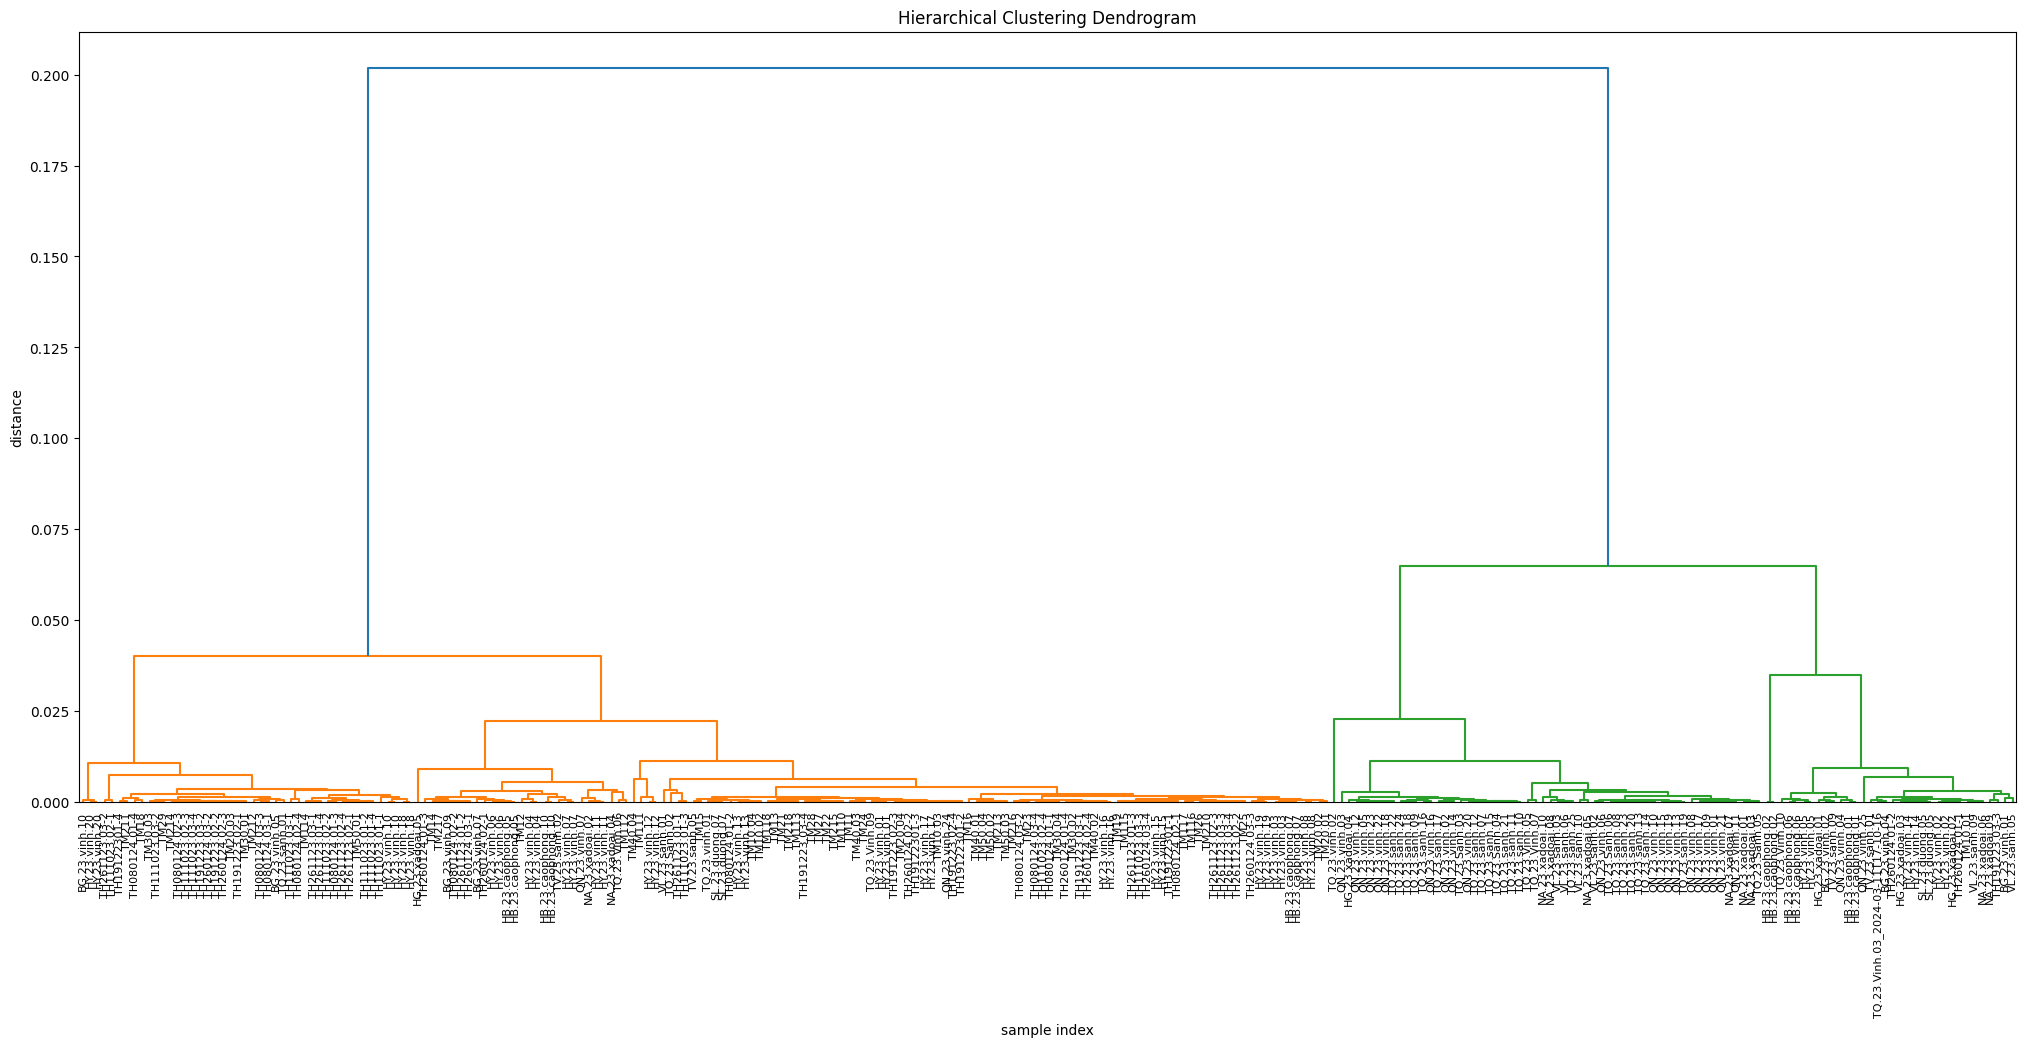

In [78]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linked,
    labels=labellist,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

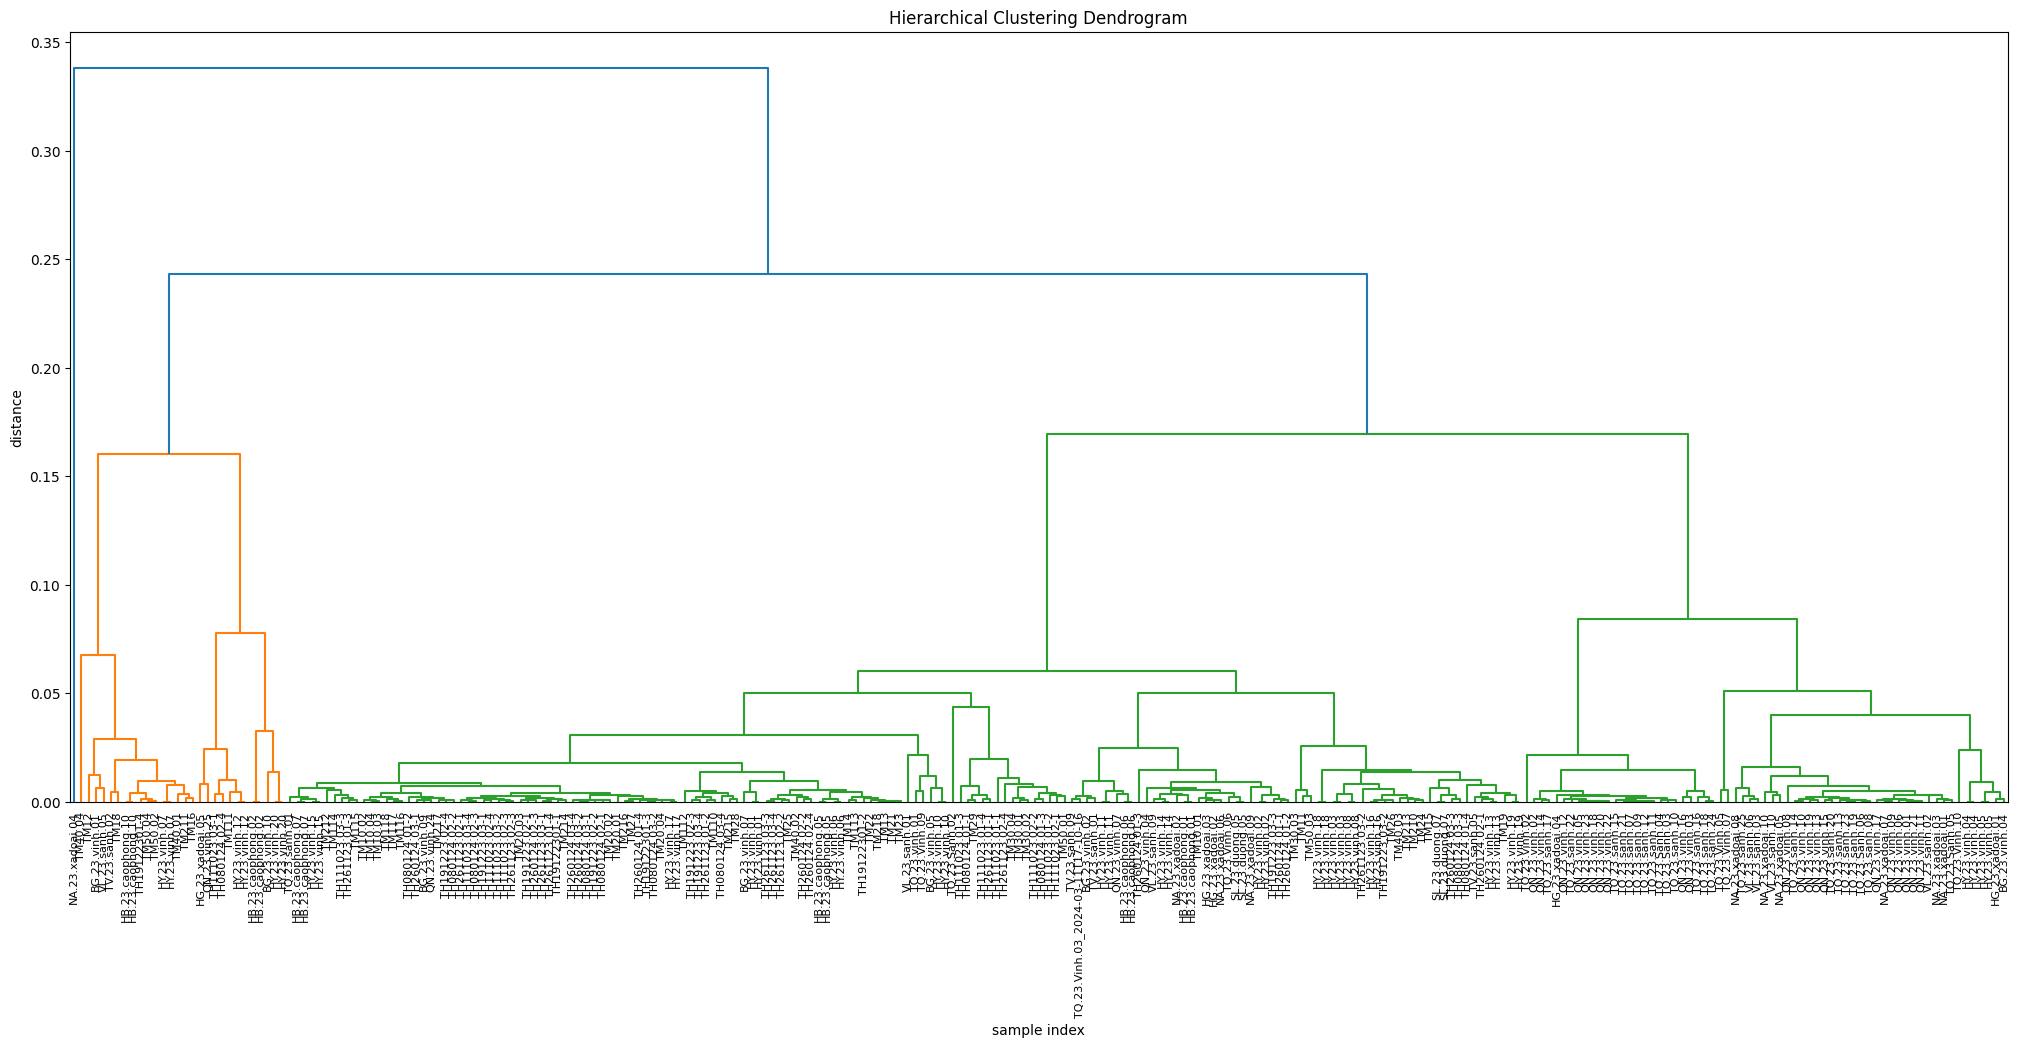

In [86]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkeddh,
    labels=labellist,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()